### Assignment Mini-Challenge 01

> To use [QuickDraw dataset](https://quickdraw.withgoogle.com) to do image classification with CNN

Below is the implementation with Keras using TF 

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
import keras.backend as K
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten,Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.5.0-dev20171016


we use **40 classes** and **10K dataset**

In [3]:
classes40 = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake']
num_classes = len(classes40)

In [4]:
num_examples_per_class = 10000 # 10k dataset

In [5]:
x_data = np.load('data/x_data_40_classes_10k.npy')

In [6]:
labels = [np.full((num_examples_per_class,), classes40.index(qdraw)) for qdraw in classes40]

y_data = np.concatenate(labels,axis=0)

In [7]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

we shuffle the train and validation data 

In [8]:
x_data, y_data = unison_shuffled_copies(x_data, y_data)

In [9]:
img_rows = 28
img_cols = 28

total_size = x_data.shape[0]

num_pred = int(0.1 * total_size)              # set 10 % for testing 
num_validate = int(0.3 * total_size)          # set 30 % for validation
num_train = int(0.6 * total_size)             # set 60 % for training

x_train = x_data[0:num_train]
y_train = y_data[0:num_train]

x_test = x_data[num_train:(num_train+num_validate)]
y_test = y_data[num_train:(num_train+num_validate)]

x_pred = x_data[(num_train+num_validate):]
y_pred = y_data[(num_train+num_validate):]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_pred = x_pred.reshape(x_pred.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_pred = x_pred.astype('float32')

# normalize the image to 0 to 1
x_train /= 255   
x_test /= 255
x_pred /= 255

print(x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_pred.shape[0], 'pred samples')

(240000, 28, 28, 1)
240000 train samples
120000 test samples
40000 pred samples


Hot encoding for the labels

In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [36]:
Inp = Input(input_shape) # 8000, 28, 28, 1
x = Conv2D(32, kernel_size=(3, 3), activation='relu', name='Conv_01')(Inp)
x = Conv2D(64, (3, 3), activation='relu', name='Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2), name = 'MaxPool_01')(x)
x = Dropout(0.2, name='Dropout_01')(x)
x = Flatten(name='Flatten_01')(x)
x = Dense(128, activation='relu', name='Dense_01')(x)
x = BatchNormalization()(x)
x = Dropout(0.2, name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax', name='Dense_02')(x)
model = Model(Inp, output)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Flatten_01 (Flatten)         (None, 9216)              0         
_________________________________________________________________
Dense_01 (Dense)             (None, 128)               1179776   
__________

In [16]:
train_epochs = 50
batch_sizes = 1024

In [38]:
def step_decay(epoch):
    if epoch<7:
        return 0.003    
    if epoch<15:
        return 0.0015
    if epoch<30:
        return 0.001   
    return 0.0005

lrate=LearningRateScheduler(step_decay)

In [39]:
adam = keras.optimizers.Adam()
model.compile( loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'] )

#### Ready to train..

In [40]:
history = model.fit(x_train, y_train, 
                    batch_size = batch_sizes, 
                    epochs = train_epochs, verbose = 1, 
                    validation_data=(x_test, y_test), 
                    callbacks=[lrate])


Train on 240000 samples, validate on 120000 samples
Epoch 1/50
240000/240000 [==============================] - 91s - loss: 1.1812 - acc: 0.6904 - val_loss: 1.0376 - val_acc: 0.7690
Epoch 2/50
240000/240000 [==============================] - 68s - loss: 0.8175 - acc: 0.7780 - val_loss: 0.7371 - val_acc: 0.7991
Epoch 3/50
240000/240000 [==============================] - 68s - loss: 0.7130 - acc: 0.8023 - val_loss: 0.6971 - val_acc: 0.8096
Epoch 4/50
240000/240000 [==============================] - 68s - loss: 0.6526 - acc: 0.8165 - val_loss: 0.7232 - val_acc: 0.8084
Epoch 5/50
240000/240000 [==============================] - 68s - loss: 0.6048 - acc: 0.8276 - val_loss: 0.6844 - val_acc: 0.8155
Epoch 6/50
240000/240000 [==============================] - 68s - loss: 0.5684 - acc: 0.8353 - val_loss: 0.6898 - val_acc: 0.8170
Epoch 7/50
240000/240000 [==============================] - 67s - loss: 0.5366 - acc: 0.8439 - val_loss: 0.6846 - val_acc: 0.8173
Epoch 8/50
240000/240000 [============

In [41]:
model.save('modelqd.h5')

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

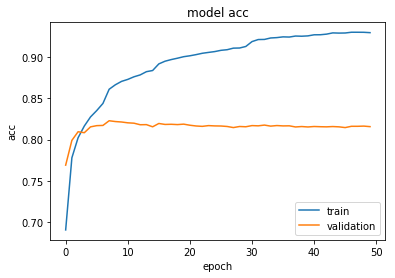

In [43]:
plot_train(history)

It looks like the model is overfitting. The next step is to play around the learning rate..

#### Continue the training by changing the learn rate manually

In [59]:
model = keras.models.load_model('modelqd.h5')

In [24]:
def step_decay1(epoch):
    return 0.0001

lrate=LearningRateScheduler(step_decay1)

history = model.fit(x_train, y_train, 
                    batch_size = batch_sizes, 
                    epochs = 270, verbose = 1, 
                    initial_epoch = 264,
                    validation_data=(x_test, y_test), 
                    callbacks=[lrate])

Train on 240000 samples, validate on 120000 samples
Epoch 265/270
240000/240000 [==============================] - 73s - loss: 0.5695 - acc: 0.8704 - val_loss: 0.3741 - val_acc: 0.9206
Epoch 266/270
240000/240000 [==============================] - 75s - loss: 0.5432 - acc: 0.8730 - val_loss: 0.3664 - val_acc: 0.9206
Epoch 267/270
240000/240000 [==============================] - 82s - loss: 0.5258 - acc: 0.8744 - val_loss: 0.3633 - val_acc: 0.9207
Epoch 268/270
240000/240000 [==============================] - 75s - loss: 0.5133 - acc: 0.8755 - val_loss: 0.3604 - val_acc: 0.9201
Epoch 269/270
240000/240000 [==============================] - 72s - loss: 0.5000 - acc: 0.8765 - val_loss: 0.3584 - val_acc: 0.9202
Epoch 270/270
240000/240000 [==============================] - 75s - loss: 0.4889 - acc: 0.8781 - val_loss: 0.3556 - val_acc: 0.9198


Save the model again

In [30]:
evaluation = model.evaluate(x_test, y_test,
          batch_size=batch_sizes)
print('.')
print('Model Accuracy = %.2f' % (evaluation[1]))
print('Model Loss = %.2f' % (evaluation[0]))

119808/120000 [============================>.] - ETA: 0s.
Model Accuracy = 0.92
Model Loss = 0.38


In [28]:
model.save('modelqd.h5')

#### Let's make predictions

In [45]:
res = model.predict(x_pred)

n_count = 0
i = 0
le = []
for r in res:
    idx = np.argmax(r)
    if idx != y_pred[i]:
        n_count = n_count + 1
        # w = r.argsort()[-3:][::-1]
        # print( classes[y_pred[i]], [classes[y_pred[j]] for j in w] )
    i = i + 1

print('Total error:', n_count, 'out of', x_pred.shape[0], 'or',n_count/x_pred.shape[0]*100,'%')

Total error: 3248 out of 40000 or 8.12 %


In [38]:
pred_accuracy = (x_pred.shape[0]-n_count) / x_pred.shape[0] * 100
print('Prediction accuracy:', pred_accuracy, '% out of', x_pred.shape[0], 'dataset')

Prediction accuracy: 91.88 % out of 40000 dataset


The prediction accuracy is **91.88 %** out of 40000 dataset